# <center>Modelagem e Simulação do Aeropêndulo<center/>

<center>
<div class="figure" >
  <img src="utils/aeropendulo.png"
       width="400"> 
  <p>Figura 1 - Diagrama esquemático do Aeropêndulo.</p>
</div>
<center/>

Usando as leis de Newton e momentos angulares podemos encontrar o modelo matemático que descreve a dinâmica do aeropêndulo, assim, temos a equação $(1)$ que modela o sistema em questão.

$$
\begin{align}
    T &= J\ddot{\theta} + c\dot{\theta} +mgd\sin{\theta} \tag{1}\\
\end{align}
$$


Onde:

>> + $T$: Empuxo gerado pela hélice;
>> + $J$: Momento de inércia;
>> + $\theta$: posição angular do Aeropêndulo;
>> + $c$: coeficiente de amortecimento viscoso;
>> + $m$: peso do Aeropêndulo;
>> + $d$: a distância entre o centro de massa e o ponto de pivô;

Linearizando o sistema

Uma das técnicas de linearização quando se tem sistemas não lineares que a componente não linear é o seno ou cosseno é  considerar o seno ou cosseno sendo o valor do próprio ângulo, isso funciona bem para pequenas variações em torno do ângulo, aplicando essa técnica ao modelo do aeropêndulo, temos a equação $(2)$.

$$
\begin{align}
    T &= J\ddot{\theta} + c\dot{\theta} +mgd\theta \tag{2}\\
\end{align}
$$

Aplicando a transformada de Laplace, temos:

$$
\begin{align}
    T(s) &= s^2J\theta(s) + sc\theta(s) +mgd\theta(s) \tag{3}\\
    T(s) &= (s^2J + sc +mgd)\theta(s) \tag{4}\\
    \frac{\theta(s)}{T(s)} &= \frac{1}{s^2J + sc +mgd} \tag{5}\\
    \frac{\theta(s)}{T(s)} &= \frac{1/J}{s^2 + sc/J +mgd/J} \tag{6}\\
\end{align}
$$

Queremos controlar o ângulo do braço do aeropêndulo  a partir da tensão aplicada aos terminais do motor, assim,devemos encontrar uma relação entre a tensão $V$ nos terminais do motor e o empuxo $T$ gerado pela hélice, essa relação é não linear, porém é possível aproximar por uma relação linear, como mostra a expressão $(7)$.

$$
\begin{align}
    T &\approx K_mV \tag{7}\\
\end{align}
$$

Aplicando a transformada de Laplace, temos:

$$
\begin{align}
    T(s) &\approx K_mV(s) \tag{8}\\
\end{align}
$$

Agora podemos substituir $(8)$ em $(6)$,

$$
\begin{align}
    \frac{\theta(s)}{K_mV(s)} &= \frac{1/J}{s^2 + sc/J +mgd/J} \tag{9}\\
    \frac{\theta(s)}{V(s)} &= \frac{K_m/J}{s^2 + sc/J +mgd/J} \tag{10}
\end{align}
$$

### Sistema no Espaço de Estados

##### Forma Canônica de Controlador

$$
    x_1=\theta \quad x_2=\dot{\theta} \quad x_2 = \dot{x_1}
$$


$$
\begin{bmatrix}
    \dot{x}_1 \\
    \dot{x}_2
\end{bmatrix}=
\begin{bmatrix}
    0             & 1\\
    -\frac{mgd}{J} & -\frac{c}{J}
\end{bmatrix}\cdot 
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}+
\begin{bmatrix}
    0 \\
    \frac{K_m}{J}
\end{bmatrix}\cdot u
$$

$$
Y= \begin{bmatrix}
    1 & 0
\end{bmatrix} \cdot
\begin{bmatrix}
    0 \\
    \frac{K_m}{J}
\end{bmatrix} + 0
$$

#### Parâmetros para Simulação

Para simulação foi usado os parâmetros do $artigo[1]$.

$$
\begin{array}{|c|c|} \hline
\text { Parâmetros do Aeropêndulo } & \text{Valores}      \\ \hline
K_m     &   0,0296                                        \\ \hline
d       &   0,03m                                         \\ \hline
J       &   0,0106 Kgm^2                                  \\ \hline
m       &   0,36 m                                  \\ \hline
g       &   9,8 m/s^2                                     \\ \hline
c       &   0,0076 Nms/rad                                \\ \hline
\end{array}
$$

### Simulação usando Python

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

plt.style.use("ggplot")

Parâmetros

In [21]:
K_m = 0.0296
m = 0.36
d = 0.03
J = 0.0106
g = 9.8
c = 0.0076

Matrizes do sistema no espaço de estados

In [22]:
A = np.array([[0, 1],
              [-(m*g*d)/J, -(c/J)]])

B = np.array([[0, K_m/J]]).T

C = np.array([1, 0])

D = 0


### Sistema no Espaço de Estados

In [23]:
sys = ct.ss(A, B, C, D)
print(sys)

<LinearIOSystem>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.          1.        ]
     [-9.98490566 -0.71698113]]

B = [[0.        ]
     [2.79245283]]

C = [[1. 0.]]

D = [[0.]]



Função de Transferência a partir do espaço de estados

In [24]:
Gs = ct.ss2tf(sys)
Gs

TransferFunction(array([2.79245283]), array([1.        , 0.71698113, 9.98490566]))

Informações do sistema em malha aberta

In [25]:
ct.step_info(sys)

{'RiseTime': 0.396481513738416,
 'SettlingTime': 10.308519357198815,
 'SettlingMin': 0.14343794449344063,
 'SettlingMax': 0.47415111647086844,
 'Overshoot': 69.54106137593485,
 'Undershoot': 0,
 'Peak': 0.47415111647086844,
 'PeakTime': 1.0308519357198815,
 'SteadyStateValue': 0.2796674225245654}

In [26]:
ct.damp(sys);

_____Eigenvalue______ Damping___ Frequency_
   -0.3585    +3.139j     0.1135       3.16
   -0.3585    -3.139j     0.1135       3.16


In [27]:
ct.poles(sys)

array([-0.35849057+3.13948884j, -0.35849057-3.13948884j])

In [28]:
ct.zeros(sys)

array([], dtype=float64)

Resposta ao Degrau Unitário

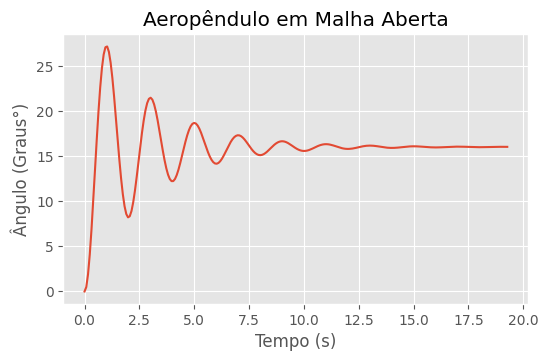

In [29]:
t, yout = ct.step_response(Gs)

fig, ax = plt.subplots(figsize=(6, 3.5))
ax.set_title("Aeropêndulo em Malha Aberta")
ax.set_ylabel("Ângulo (Graus°)")
ax.set_xlabel("Tempo (s)")
ax.plot(t, np.rad2deg(yout))
plt.show()